# PP2 - Parte 1

## Notebook do exercício prático 2, Parte 1

* **UEA - Universidade do Estado do Amazonas**
* **EST - Escola Superior de Tecnologia**
* **Matéria de Redes Neurais**
* **Professora Elloá Guedes**
* **Repositório:** https://github.com/levidasilvalima/RNA-PP2

### Autores
* Ian Gustavo Alves Pessoa Silva - 1715080288  
* William Azevedo da Silva - 1615080226  
* Daniel Akio Chen - 1715080253  
* Levi da Silva Lima - 1615080131  


## Import das bibliotecas
Aqui há apenas um simples import das bibliotecas a serem usadas

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Import do arquivo a ser usado
Como o próprio nome diz, é import dos dados brutos a serem usados.


In [2]:
dados_brutos = np.fromfile('./dataAll.txt')
print(dados_brutos)

[-363.7884  244.1423    0.     ... -140.147   734.0983    0.    ]


## Organização dos dados
Como os dados estão em um vetor único gigante, devemos remoldá-lo para podermos manipulá-lo.  
Usando o *reshape* e o *transpose*, os dados foram reconstruídos para que o x, y e resultado caberem em vetores diferentes  
  
Aqui, temos:
* Vetor1: Contém elementos X da tupla
* Vetor2: Contém elementos Y da tupla
* Vetor_resposta: Contém elementos *Resposta* da tupla
* x0: É um termo único adicionado, descrito no modelo de neurônio perceptron de Rosenblatt

In [3]:
dados_consertados = dados_brutos.reshape((1000,3))
dados = dados_consertados.transpose()

vetor1 = np.array(dados[0])
vetor2 = np.array(dados[1])
vetor_resposta = np.array(dados[2])
x0 = -1


## Inicialização dos pesos aleatórios
Aqui, para fazer uma simulação boa e demonstrar que podemos chegar ao resultado final de qualquer forma, geramos 3 pesos aleatórios.  
Os pesos foram gerados no intervalo {-0.5, 0.5}

In [4]:
pesos = np.random.uniform(-0.5, 0.5, 3)

print("Pesos iniciais: ", pesos)

Pesos iniciais:  [ 0.03626703 -0.25490559 -0.27714866]


## Função de ativação
Aqui temos a função de ativação que será usada para validar as respostas do aprendizado.  
A função usada foi a função de ativação degrau, com v = 0.  
Ou seja, quando a entrada é 0 ou maior, é 1, caso contrário é 0.

In [5]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
    if saida >= 0:
        return 1
    else:
        return 0
        

## Principal - Aprendizado
Aqui temos a parte principal desta parte 1, o código de aprendizagem dos pesos.  
O código irá ser executado e verificará a função de ativação e a resposta final, ajustando os pesos quando necessário.  
Além disso, o código irá contar quantas vezes os pesos foram ajustados e o numero de épocas.  
No final, ele irá *imprimir* os **ajustes feitos**, o **número de épocas** e o **número de ajustes feitos**.
  
Nós temos:  
* n: A taxa de Aprendizado.  
* epoca: Um ciclo de aprendizagem, um ciclo acaba quando todos os pesos visitados 1 vez(modificado ou não).  
* mudanca_peso: Quantas vezes o peso foi ajustado em uma época.  
* mudanca_total: Quantas vezes, ao total, o peso foi ajustado.  

Para parar, o código verificará todo final de época se houve convergência.  
Para convergir, o vetor das funções de ativação deve ser igual ao vetor resultado

In [6]:
#Temporários
res_temp = 0                    # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(1000)    # Vetor que será comparado com o resultado
fa = 0                          # Funcao de ativacao

#Pontos de Interesse
n = 0.1             # Taxa de aprendizado
mudanca_peso = 0    # N de ajustes de peso
mudanca_total = 0   # N total de ajustes de peso
epoca = 0           # Epocas de ajuste


#Ele só para quando o vetor de respostas for igual ao vetor final
while(True):

    print("Epoca ", epoca+1, ": ")
    for i in range(len(dados[0])):

        vetor_res_temp = (x0*pesos[0]) + (vetor1[i]*pesos[1]) + (vetor2[i]*pesos[2])

        fa = funcao_ativacao(vetor_res_temp)

        vetor_final[i] = fa

        if (fa != vetor_resposta[i]): #Se estiver errado

            #Erro é (esperado - funcao ativacao)
            erro = vetor_resposta[i] - fa

            valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
            #Ajuste de peso
            pesos = pesos + (n*erro*valor_anterior)
            mudanca_peso += 1

            #Print vetor de pesos, exerc 5
            print(pesos)

    epoca += 1

    #Print dos pesos da época
    print("Época ", epoca, ": ", mudanca_peso, " pesos mudados")
    mudanca_total += mudanca_peso
    mudanca_peso = 0

    if((vetor_resposta == vetor_final).all()):
        break



print("convergiu!")
# Se for true, quer dizer que os dois são iguais, chegou a uma convergência
# print((vetor_resposta == vetor_final).all())


Epoca  1 : 
[  0.13626703  36.12393441 -24.69137866]
[   0.23626703  -17.53511559 -101.18712866]
[  0.13626703  55.26090441 -65.35756866]
[3.62670266e-02 1.37859604e+02 1.44982613e+01]
[ 1.36267027e-01  1.43705364e+02 -6.37963287e+01]
[   0.23626703  103.69645441 -141.68901866]
[  0.33626703 157.36626441 -92.59674866]
[   0.23626703  104.40620441 -149.46620866]
[  0.33626703 163.96572441 -99.34387866]
[   0.23626703  118.44109441 -164.97980866]
[  0.33626703 209.15695441 -90.26648866]
[   0.23626703  151.37596441 -150.57463866]
[ 1.36267027e-01  1.03109404e+02 -1.99044359e+02]
[ 3.62670266e-02  1.73556754e+02 -1.56928089e+02]
[-6.37329734e-02  1.26714754e+02 -2.08337959e+02]
[-1.63732973e-01  1.96578384e+02 -1.44119019e+02]
[-6.37329734e-02  1.40742654e+02 -2.00296549e+02]
[-1.63732973e-01  2.17730124e+02 -1.35447219e+02]
[  -0.26373297  181.46008441 -178.67525866]
[-1.63732973e-01  1.63220944e+02 -1.97008899e+02]
[  -0.26373297  238.64338441 -130.95378866]
[  -0.36373297  174.28425441

## Calculo da função da reta
Depois de se ter calculado os pesos e havido a convergência, nós podemos encontrar a curva que descreve a divisão dos pontos.  
  
A curva pode ser descrita como:  
  
$$y = \frac{w0}{w2} - \frac{w1}{w2}*x$$
  
  



In [7]:
funcao_a = pesos[0]/pesos[2]
funcao_b = pesos[1]/pesos[2]

x = np.arange(-1000,1000)

y = funcao_a - funcao_b * x

print("funcao: y=", funcao_a, "-", funcao_b, "*x")


funcao: y= 0.0016684279469030782 - -1.0024688648804658 *x


## Plot do gráfico e print dos ajustes e épocas totais
Finalmente, conseguido a função da reta, nós podemos plotar a reta junto com pontos descritos pelos dados.  
Assim, podemos visualizar se a reta corretamente dividiu os dados.  

Total de ajustes de peso:  24
Total de épocas:  2


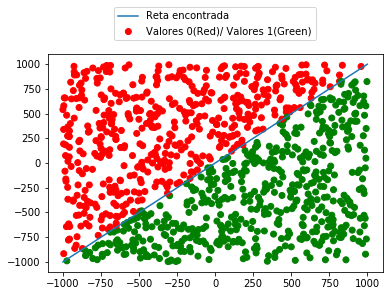

In [8]:
cor = np.where(vetor_resposta == 0, "red", "green")

print("Total de ajustes de peso: ", mudanca_total)
print("Total de épocas: ", epoca)

plt.scatter(vetor1, vetor2, c=cor, label = "Valores 0(Red)/ Valores 1(Green)")
plt.plot(x, y, label = "Reta encontrada")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.24))

## Resultados  
Os ajustes acima resultaram em 24.  
Além disso, o número de épocas resultou em 2.  

## Considerações finais
Pode se ver pelo gráfico acima, que a reta dividiu satisfatoriamente os pontos de valores 0 e 1.  
Além disso, por causa do intervalo possível de pesos iniciais, o número de ajustes e épocas podem variar bastante.
No caso acima, os ajustes e épocas resultaram em 24 e 2 respectivamente, porém, nos testes feitos, houveram casos que o número de épocas chegou a 8 e até mesmo 13. Enquanto isso,
o número de ajustes chegou a 80 em alguns testes.  
Portanto, pode-se ver que, apesar dos pesos iniciais, o modelo perceptron de Rosenblatt eventualmente converge em uma reta que divide os dois conjuntos.  
Claro, isso tudo graças ao fato que o conjunto é linearmente separável.